In [1]:
import numpy as np
import pandas as pd

#读取数据为dataframe
df2019 = pd.read_csv('A2019届毕业去向.csv',encoding = 'utf-8')
df2018 = pd.read_csv('A2018届毕业去向.csv',encoding = 'utf-8')
df2017 = pd.read_csv('A2017届毕业去向.csv',encoding = 'utf-8')
df2016 = pd.read_csv('A2016届毕业去向.csv',encoding = 'utf-8')
df2015 = pd.read_csv('A2015届毕业去向.csv',encoding = 'utf-8')

2019升学人数: 197
2019就业人数: 353
2019总人数: 564
就业人数占比: 0.63
升学人数占比: 0.35


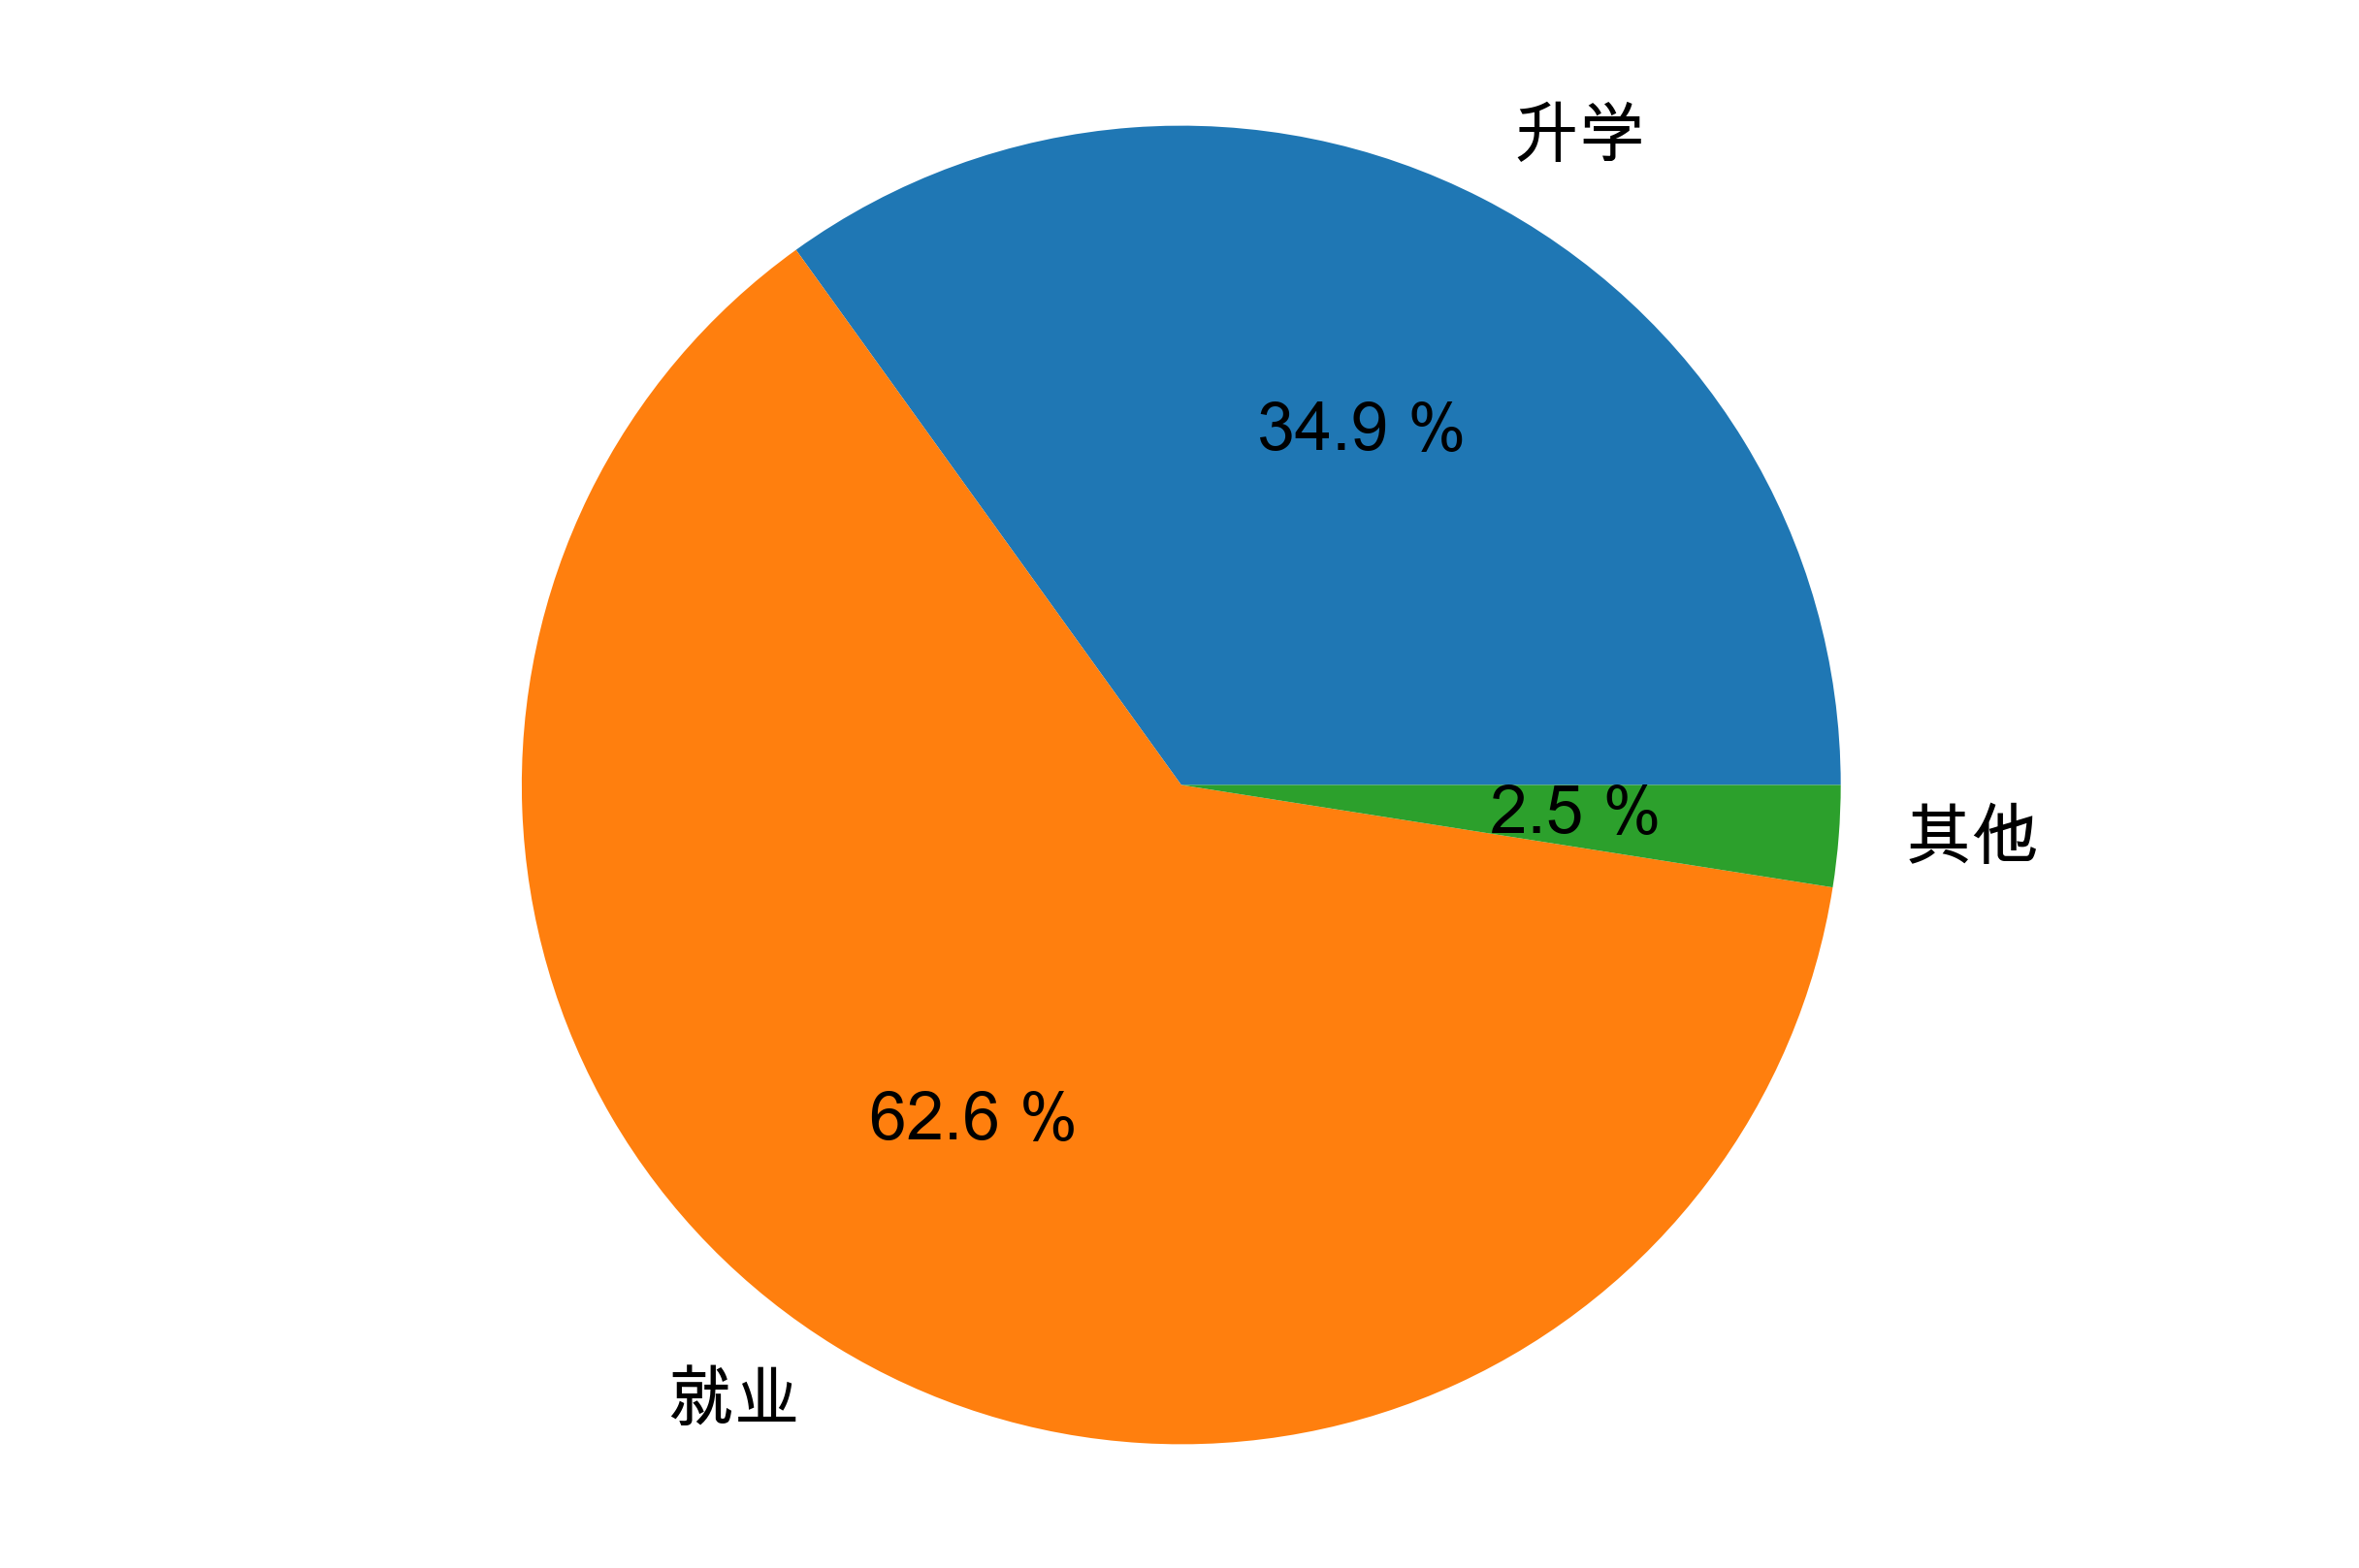

In [115]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Arial Unicode MS']
##数据分类分为，升学，就业两大类
master_account_2019 = df2019[df2019['就业形式'].isin(['已上硕','已出国'])] #升学的数据
#就业的数据
work_account_2019 = df2019[df2019['就业形式'].isin(['单位用人证明','签就业协议','签劳动合同'])]

##就业升学占比数据分析
master_number_2019 = len(master_account_2019)
work_number_2019 = len(work_account_2019)
students_2019 = len(df2019)
master_proportion_2019 = master_number_2019 / students_2019
work_proportion_2019 = work_number_2019 / students_2019
others_2019 = students_2019 - work_number_2019-master_number_2019
print('2019升学人数:', master_number_2019)
print('2019就业人数:',work_number_2019)
print('2019总人数:',students_2019)
print('就业人数占比:','%.2f'%work_proportion_2019)
print('升学人数占比:','%.2f'%master_proportion_2019)
plt.pie(x=[master_number_2019,work_number_2019,others_2019],labels = ['升学','就业','其他'],autopct='%3.1f %%')
plt.axis('equal')
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['figure.dpi'] = 500 
plt.show()

2019校招就业人数: 333
2019校招就业占比: 0.94
2019社招就业人数: 1
2019社招就业占比: 0.00


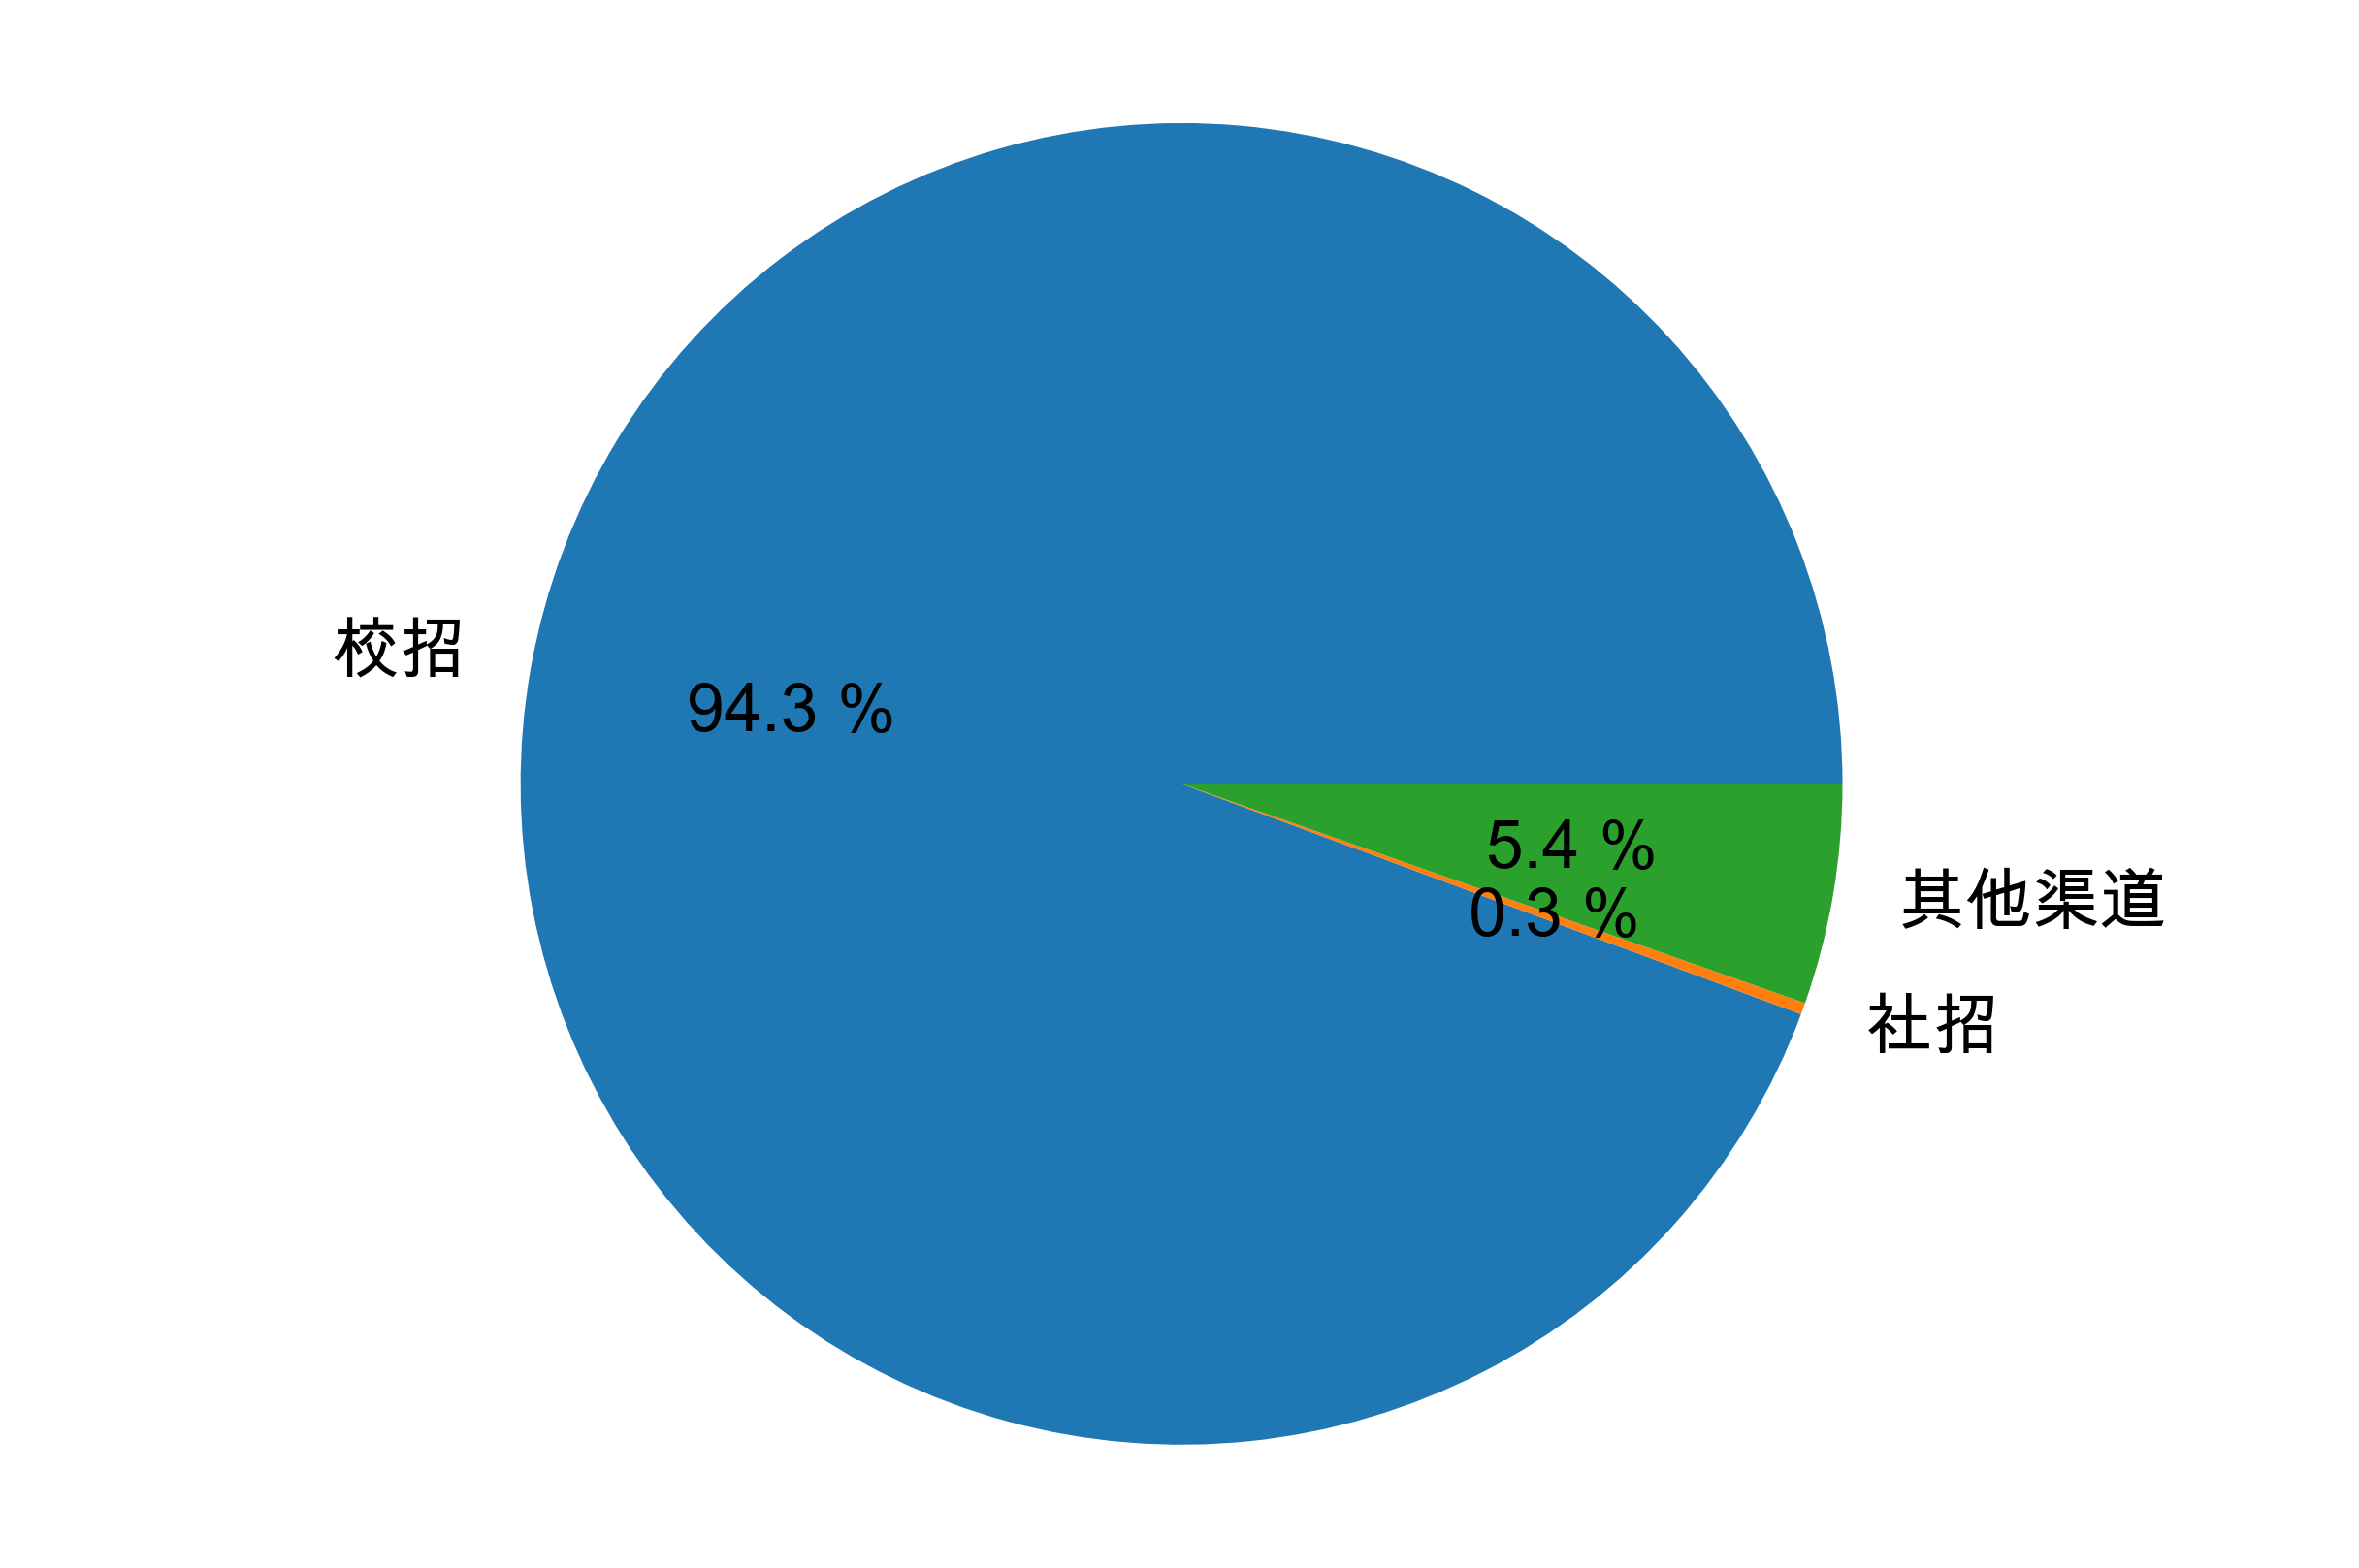

In [116]:
##就业数据分析2019

##就业渠道分析
#校招渠道
school_recommand_2019 = work_account_2019[work_account_2019['落实工作渠道'].isin(['校园招聘会(学校推荐)'])] #
school_recommand_number_2019 = len(school_recommand_2019)
#社招渠道
social_hire_2019 = work_account_2019[work_account_2019['落实工作渠道'].isin(['社会招聘会'])] 
social_hire_number_2019 = len(social_hire_2019)
#学生总人数
work_students_2019 = len(work_account_2019)
#其他渠道
other_work_2019 = work_students_2019-school_recommand_number_2019-social_hire_number_2019

#各类占比
school_recommand_2019_proportion = school_recommand_number_2019/work_students_2019
social_hire_2019_proportion = social_hire_number_2019/work_students_2019

print('2019校招就业人数:',school_recommand_number_2019)
print('2019校招就业占比:','%.2f'%school_recommand_2019_proportion)
print('2019社招就业人数:',social_hire_number_2019)
print('2019社招就业占比:','%.02f'%social_hire_2019_proportion)

plt.pie(x=[school_recommand_number_2019,social_hire_number_2019,other_work_2019],labels = ['校招','社招','其他渠道'],autopct='%3.1f %%')
plt.axis('equal')
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['figure.dpi'] = 500
plt.show()

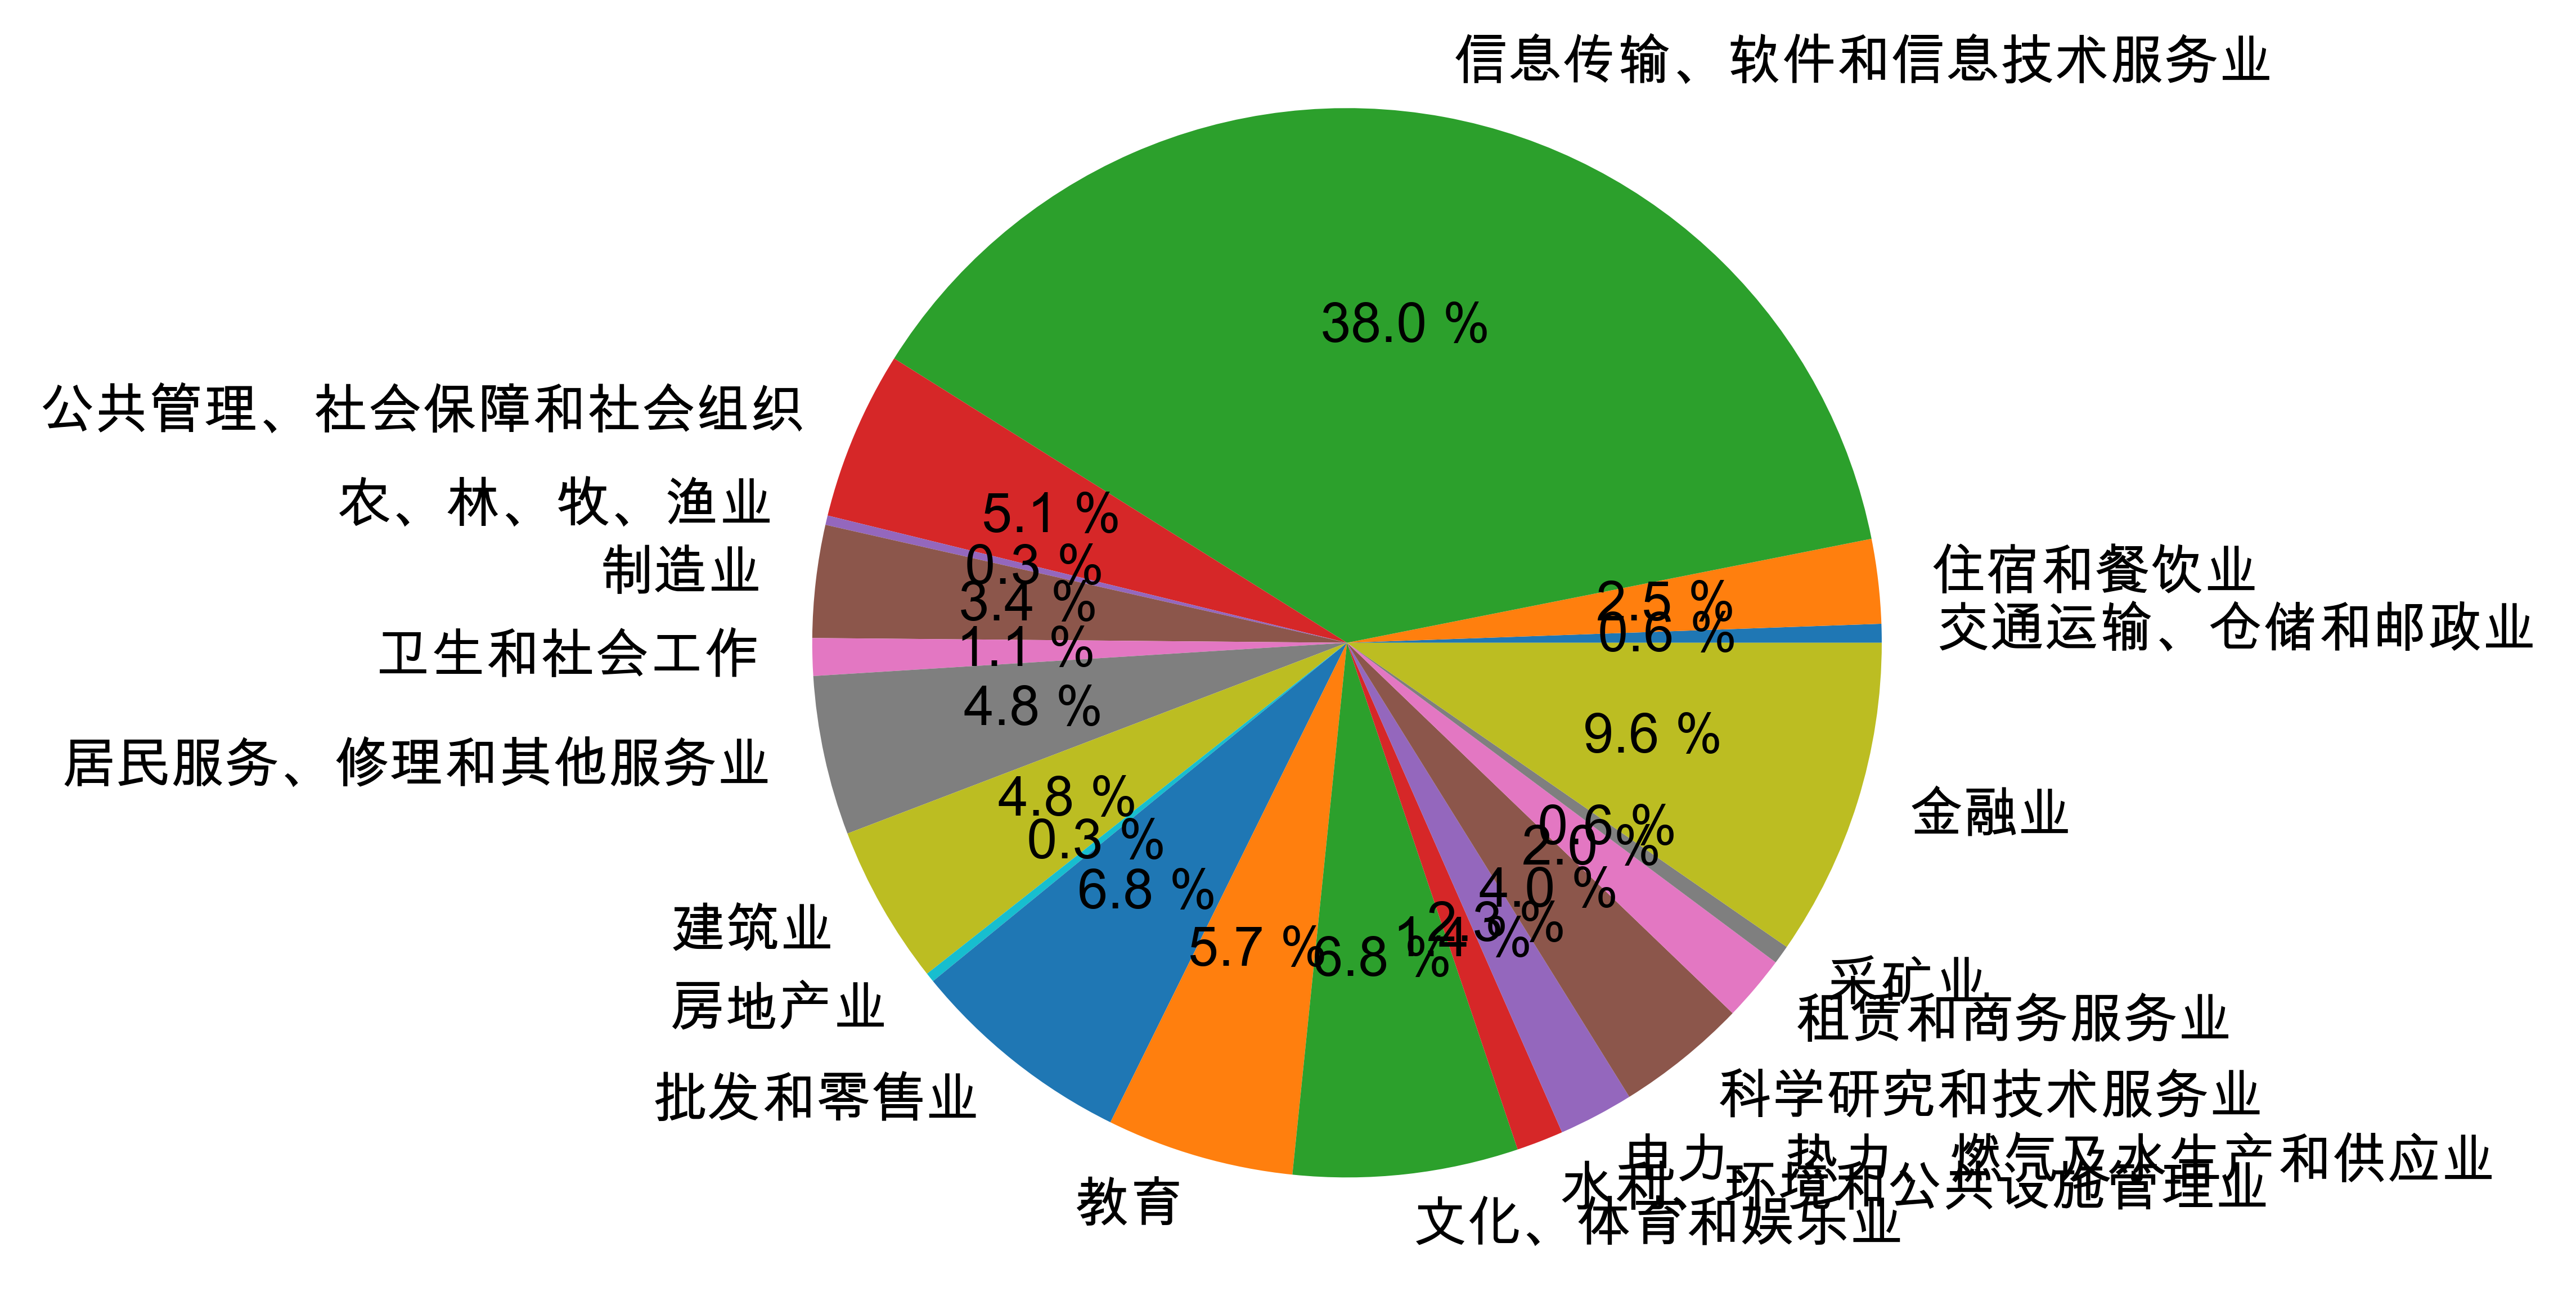

In [123]:
#校招数据分析，
#1.校招分成派遣和二分
#2.单位行业统计类别信息，权重，画词云图，占比图，(完成)
#3.单位企业性质，数量权重，画词云图，占比图（完成）
#4.就业地图分布（完成）

#2.单位行业统计信息
import wordcloud
##筛选数据
weights_ = work_account_2019.groupby(by=['单位行业'],as_index=False).count()
cols=['单位行业','学号']
weights_ = weights_[cols]
plt.pie(x=weights_['学号'],labels = weights_['单位行业'],autopct='%3.1f %%')
plt.axis('equal')
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['figure.dpi'] = 500
plt.show()

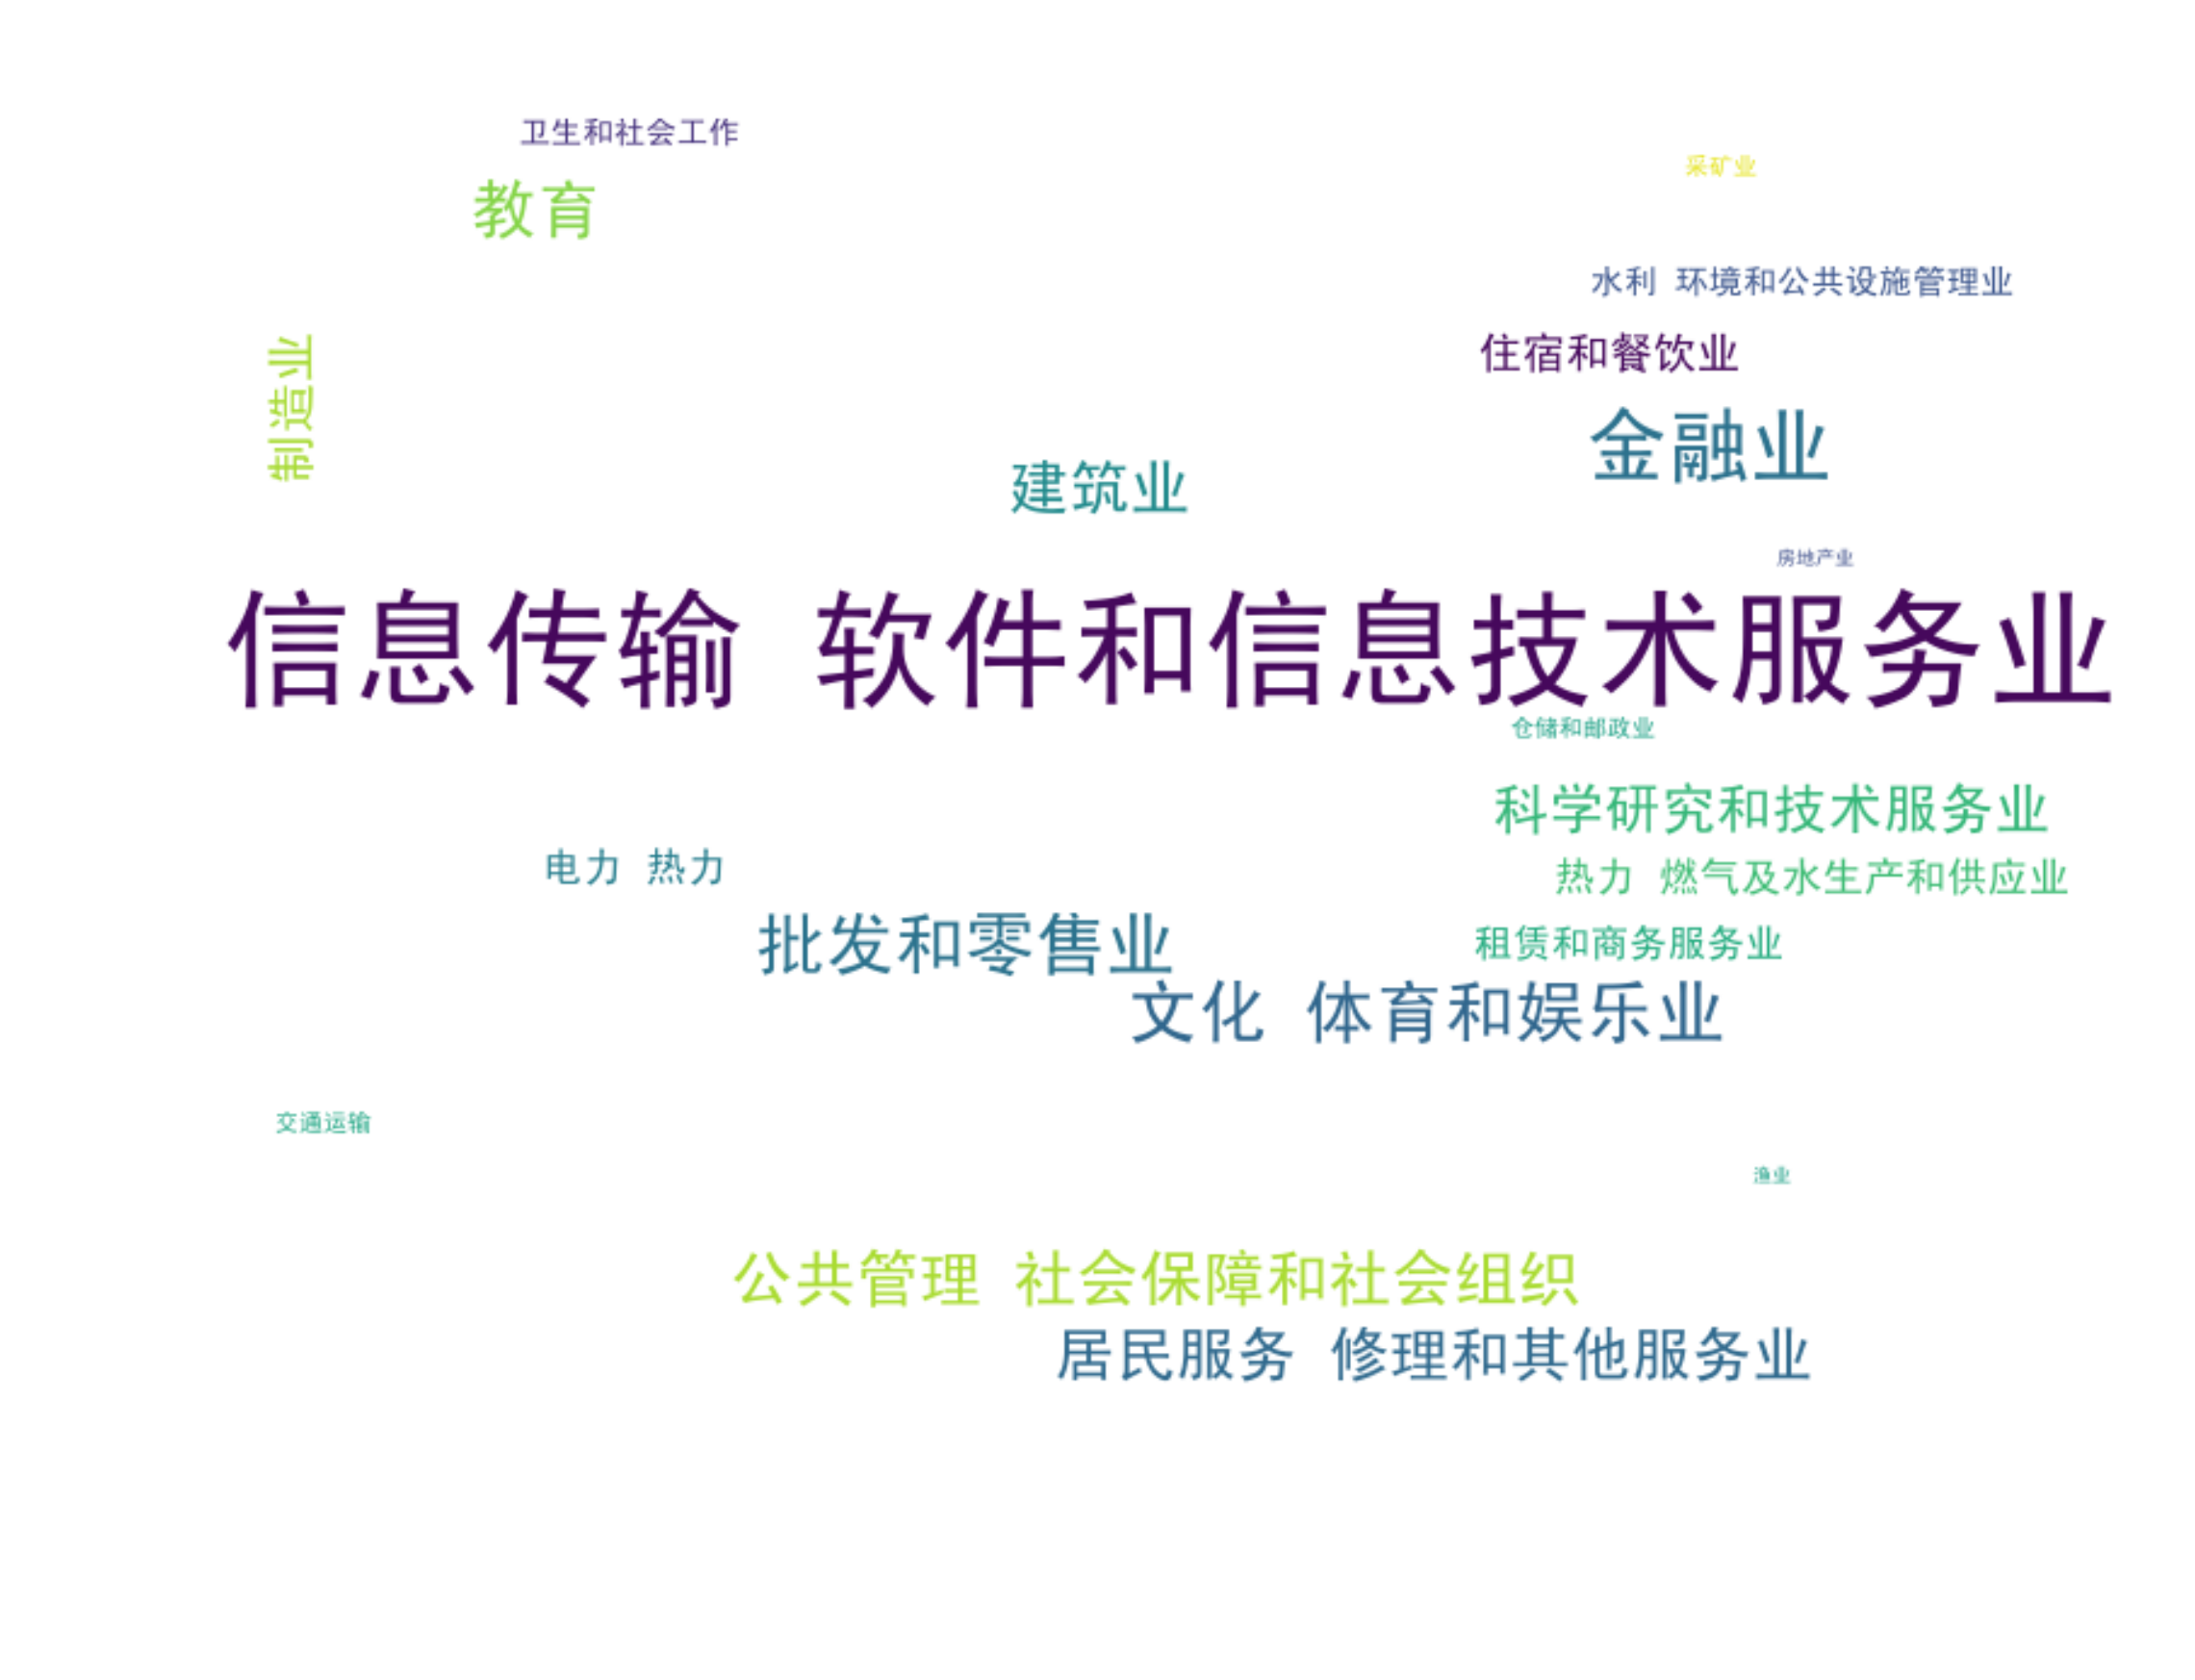

In [143]:
##单位行业词云统计数据
#import wordcloud
from wordcloud import WordCloud
text = work_account_2019['单位行业']
#数据过滤
text = str(text.tolist())
text = text.replace('[','')
text = text.replace(']','')
text = text.replace('\'','')
wordcloud = WordCloud(background_color = 'white',font_path='Downloads/SimHei.ttf',width=800,height=600,max_font_size=80).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['figure.dpi'] = 500
plt.show()

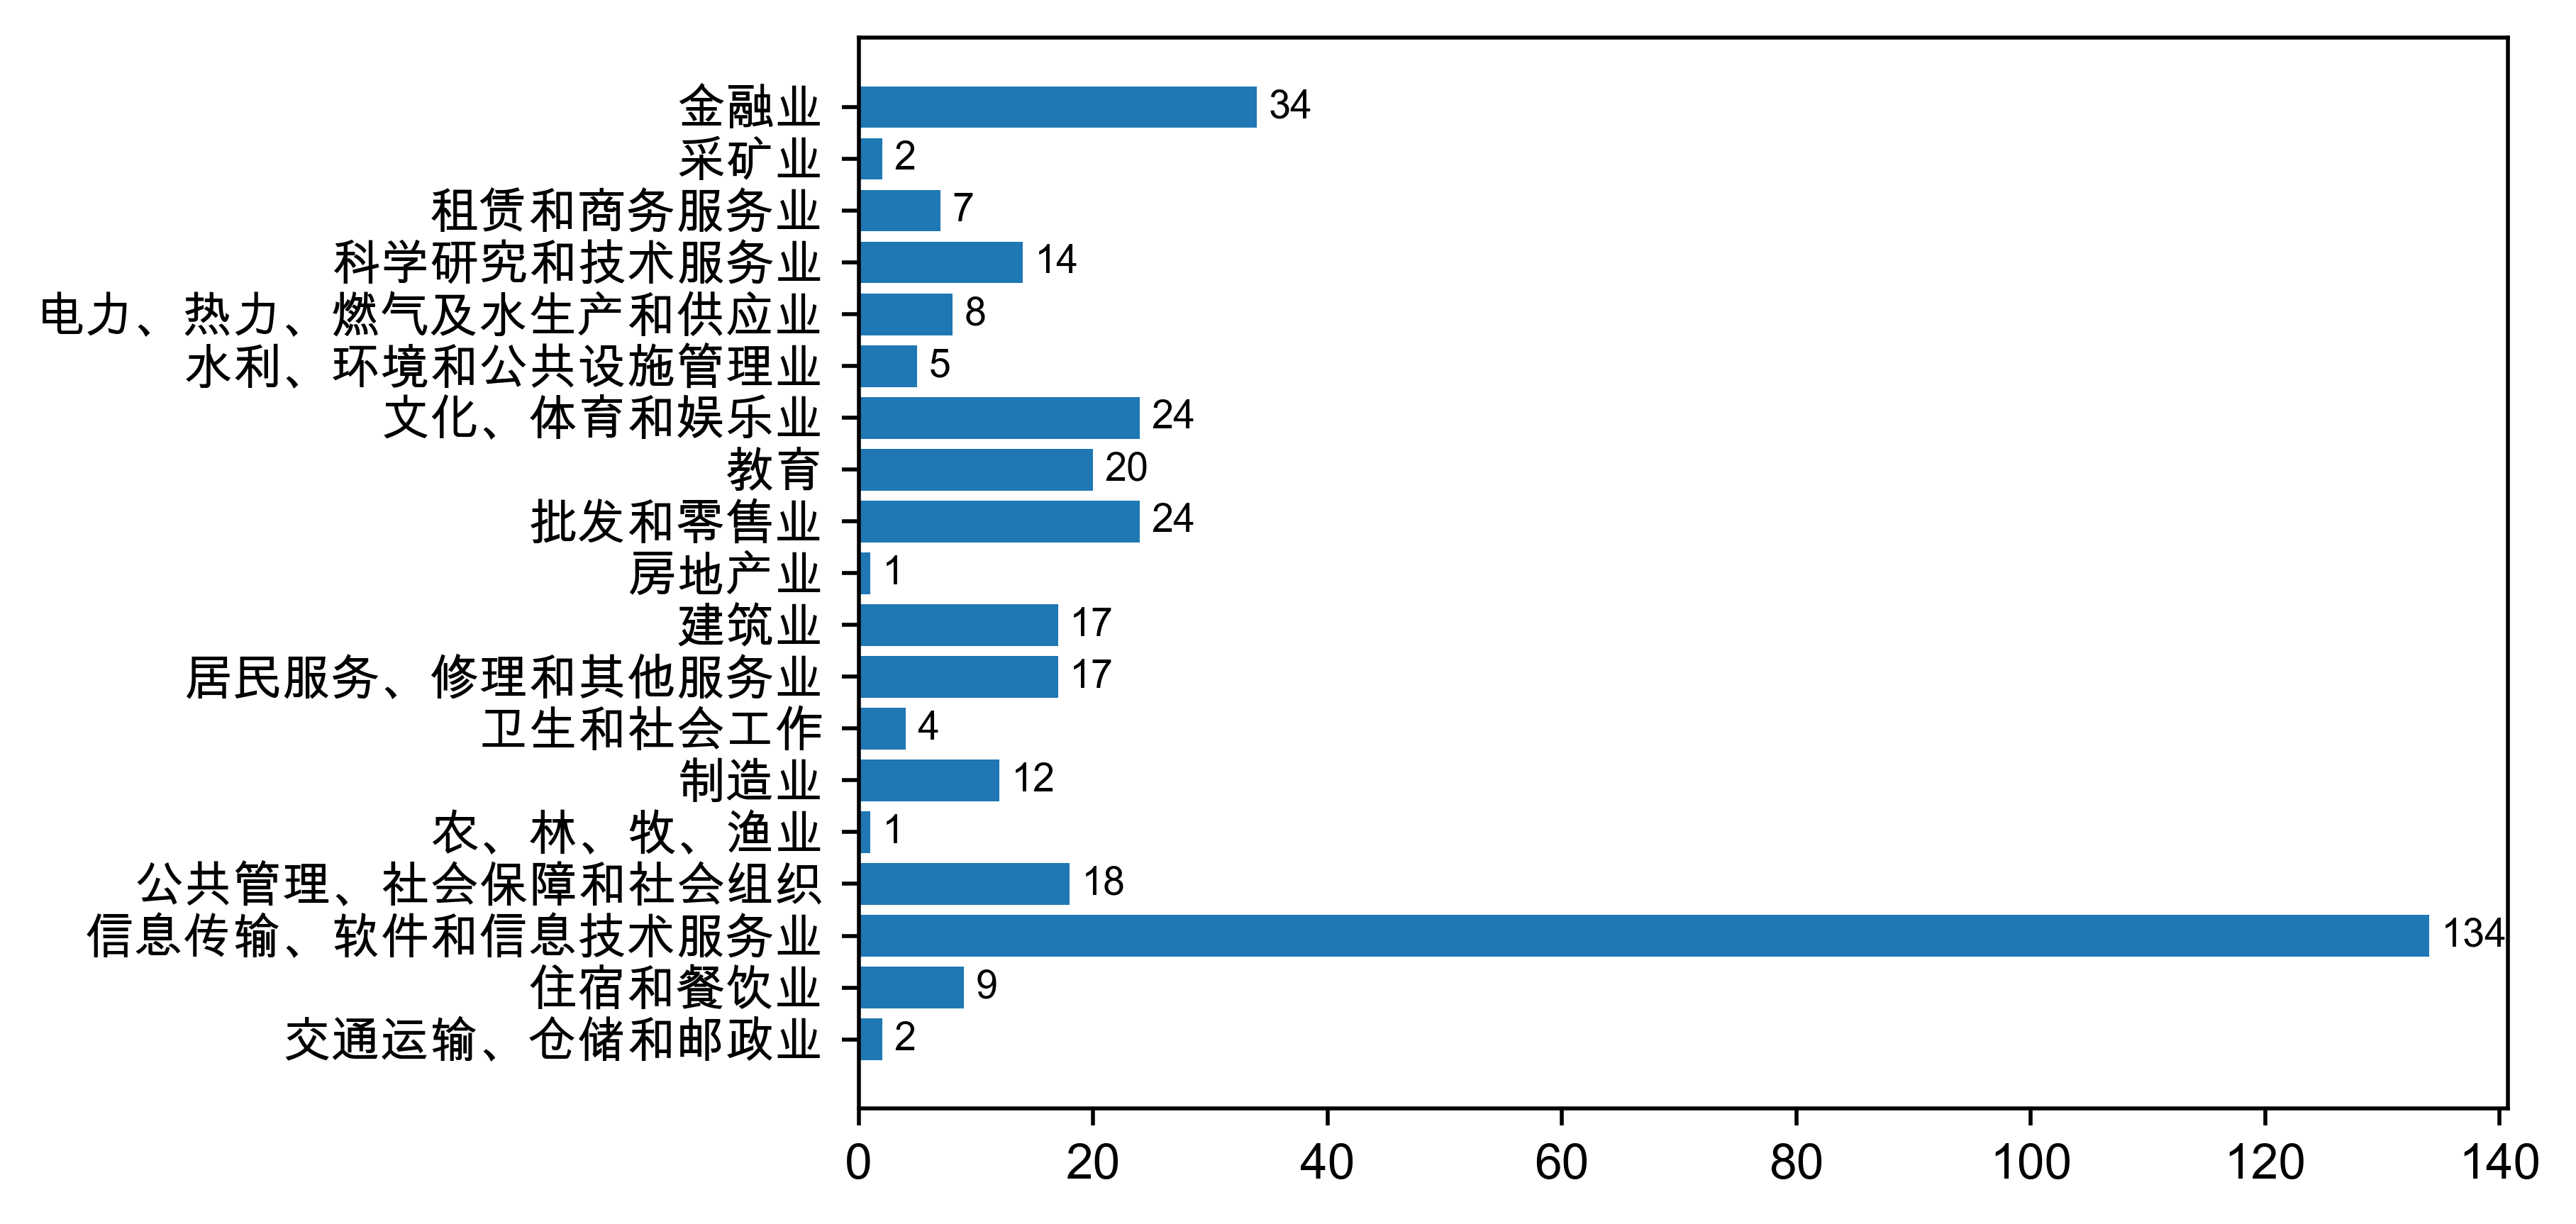

In [142]:
#单位行业柱状图
plt.barh(range(len(weights_['学号'])), weights_['学号'],tick_label = weights_['单位行业'])
for score, pos in zip(weights_['学号'], range(len(weights_['学号']))):
    plt.text(score + 1, pos,score, horizontalalignment='left', verticalalignment='center', fontsize=8)
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['figure.dpi'] = 500
plt.show()

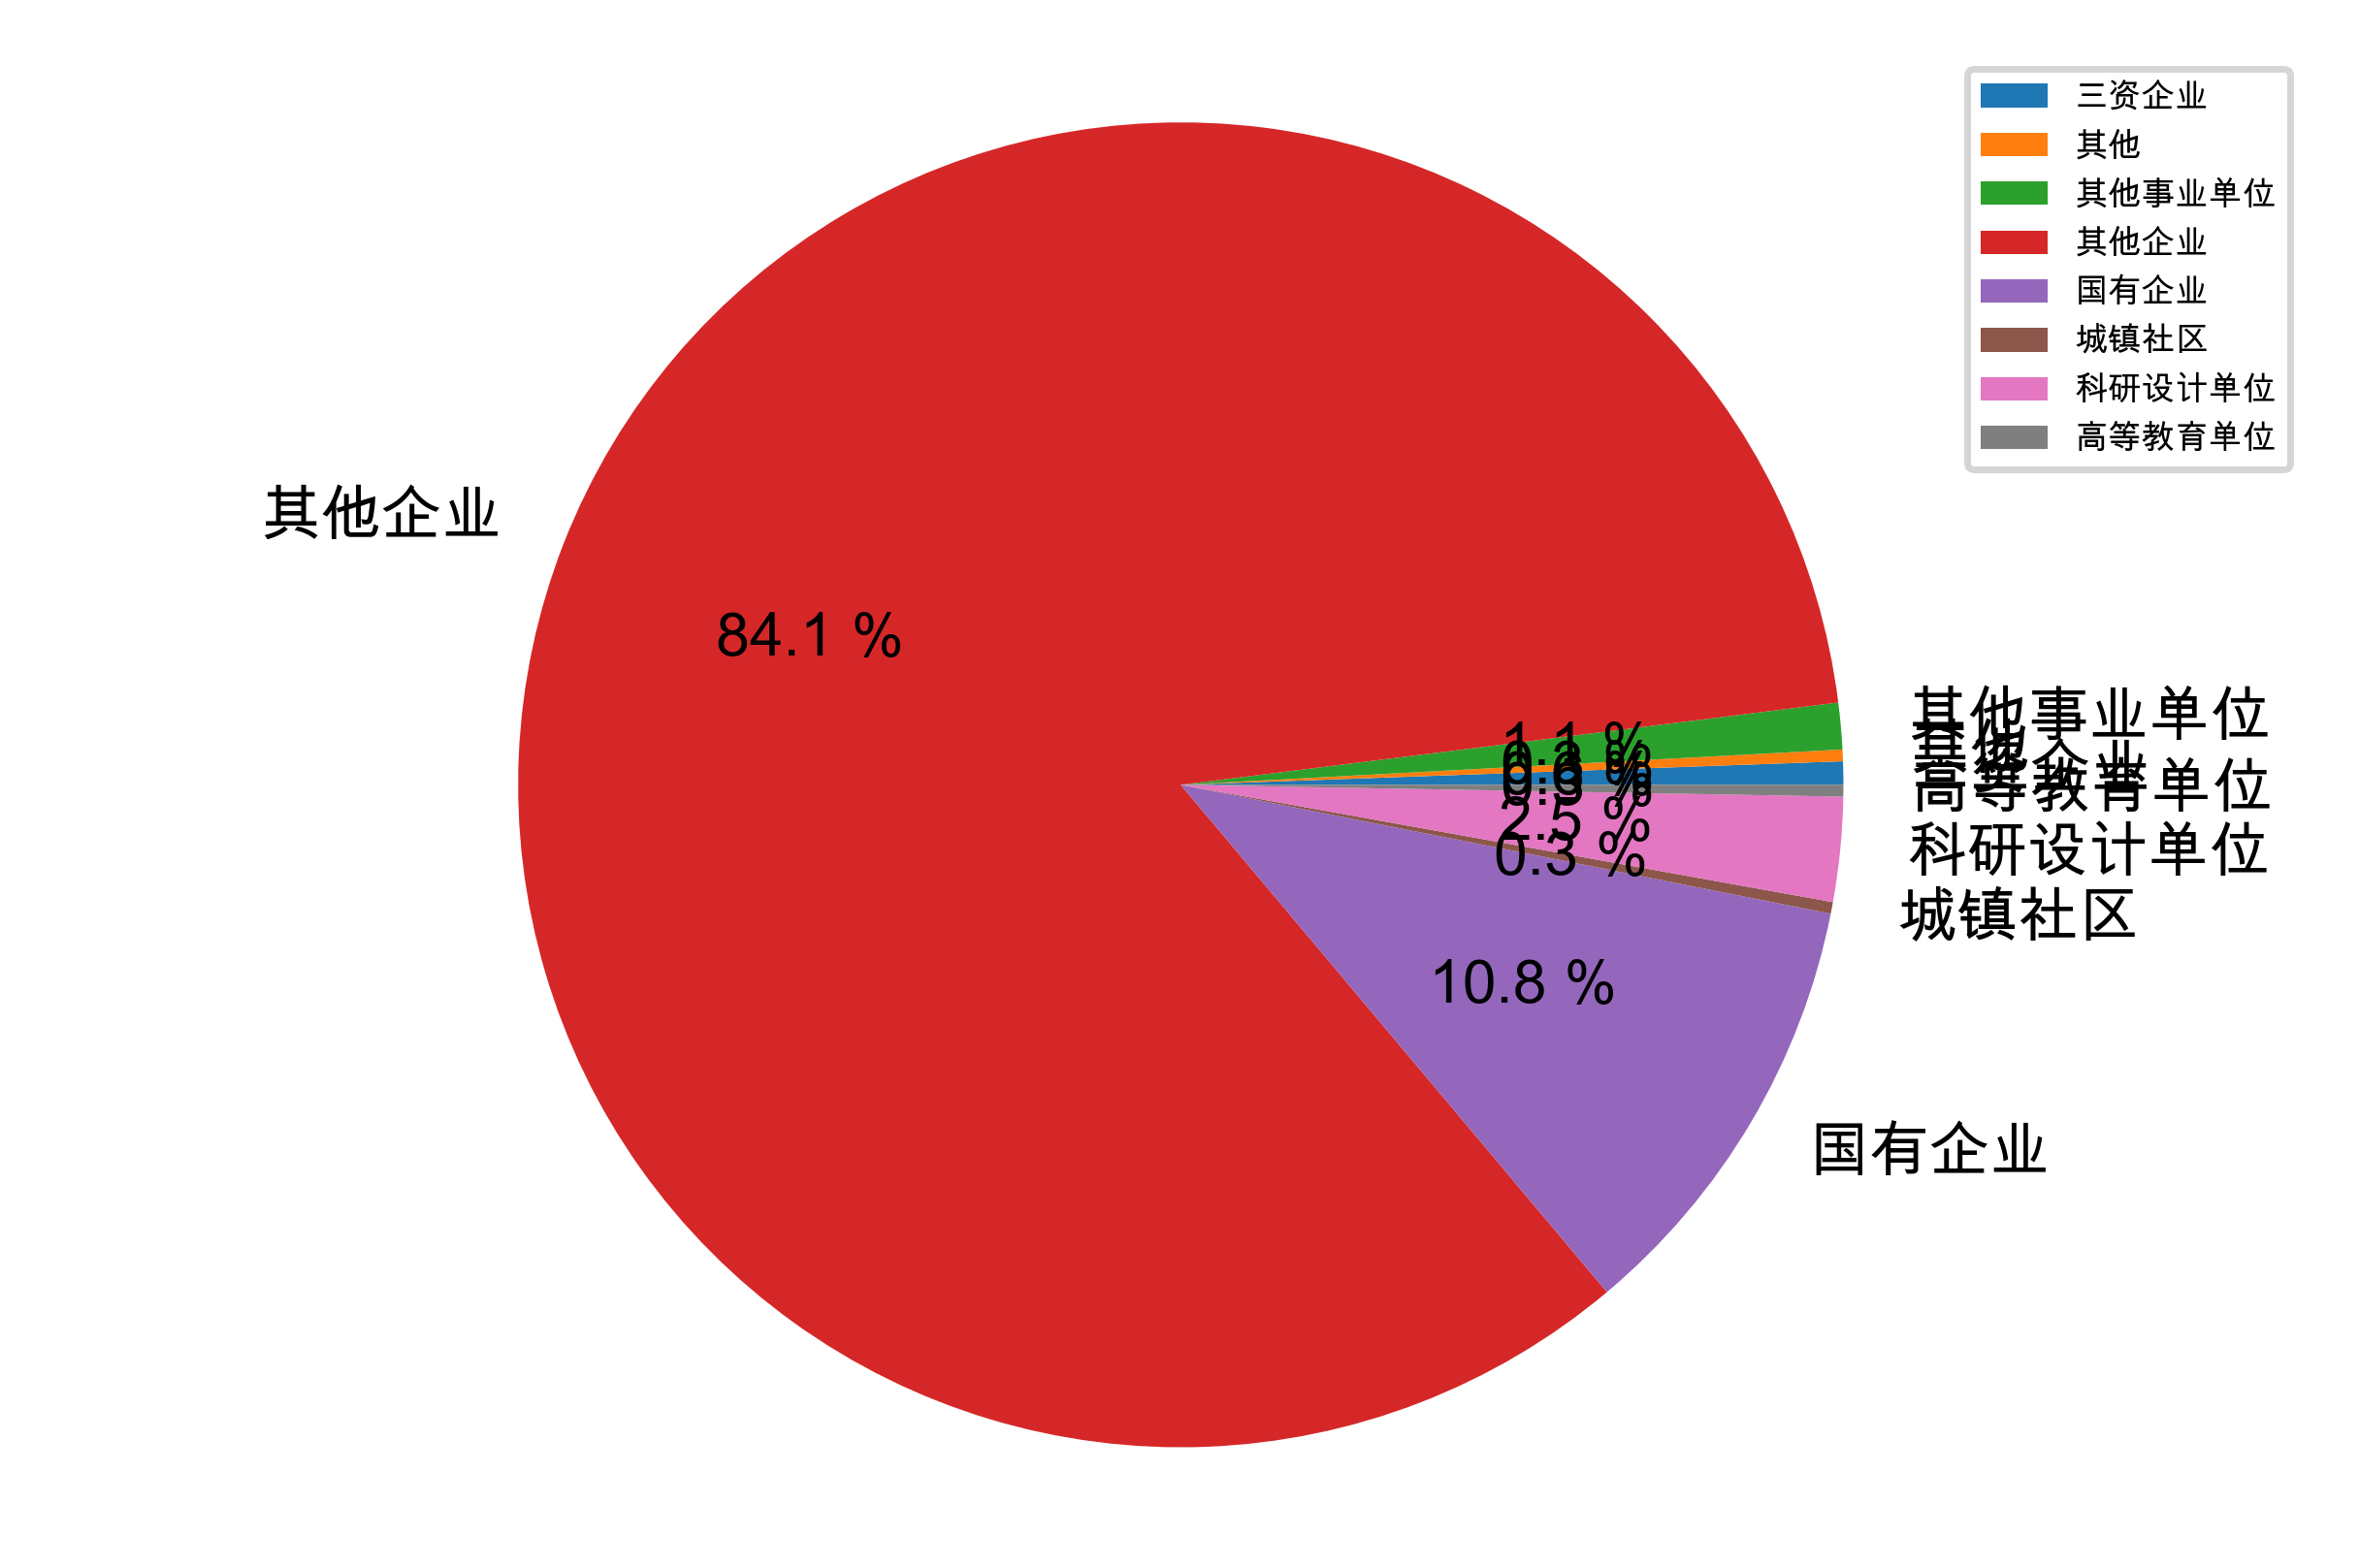

In [161]:
character_ = work_account_2019.groupby(by=['单位性质'],as_index=False).count()
cols=['单位性质','学号']
character_ = character_[cols]
patches,l_text,p_text=plt.pie(x=character_['学号'],labels = character_['单位性质'],autopct='%3.1f %%',)
# for t in l_text:
#     t.set_size=(5)
# for t in p_text:
#     t.set_size=(5)
plt.axis('equal')
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['figure.dpi'] = 500
plt.rcParams['font.size'] = 5.0
plt.legend()
plt.show()

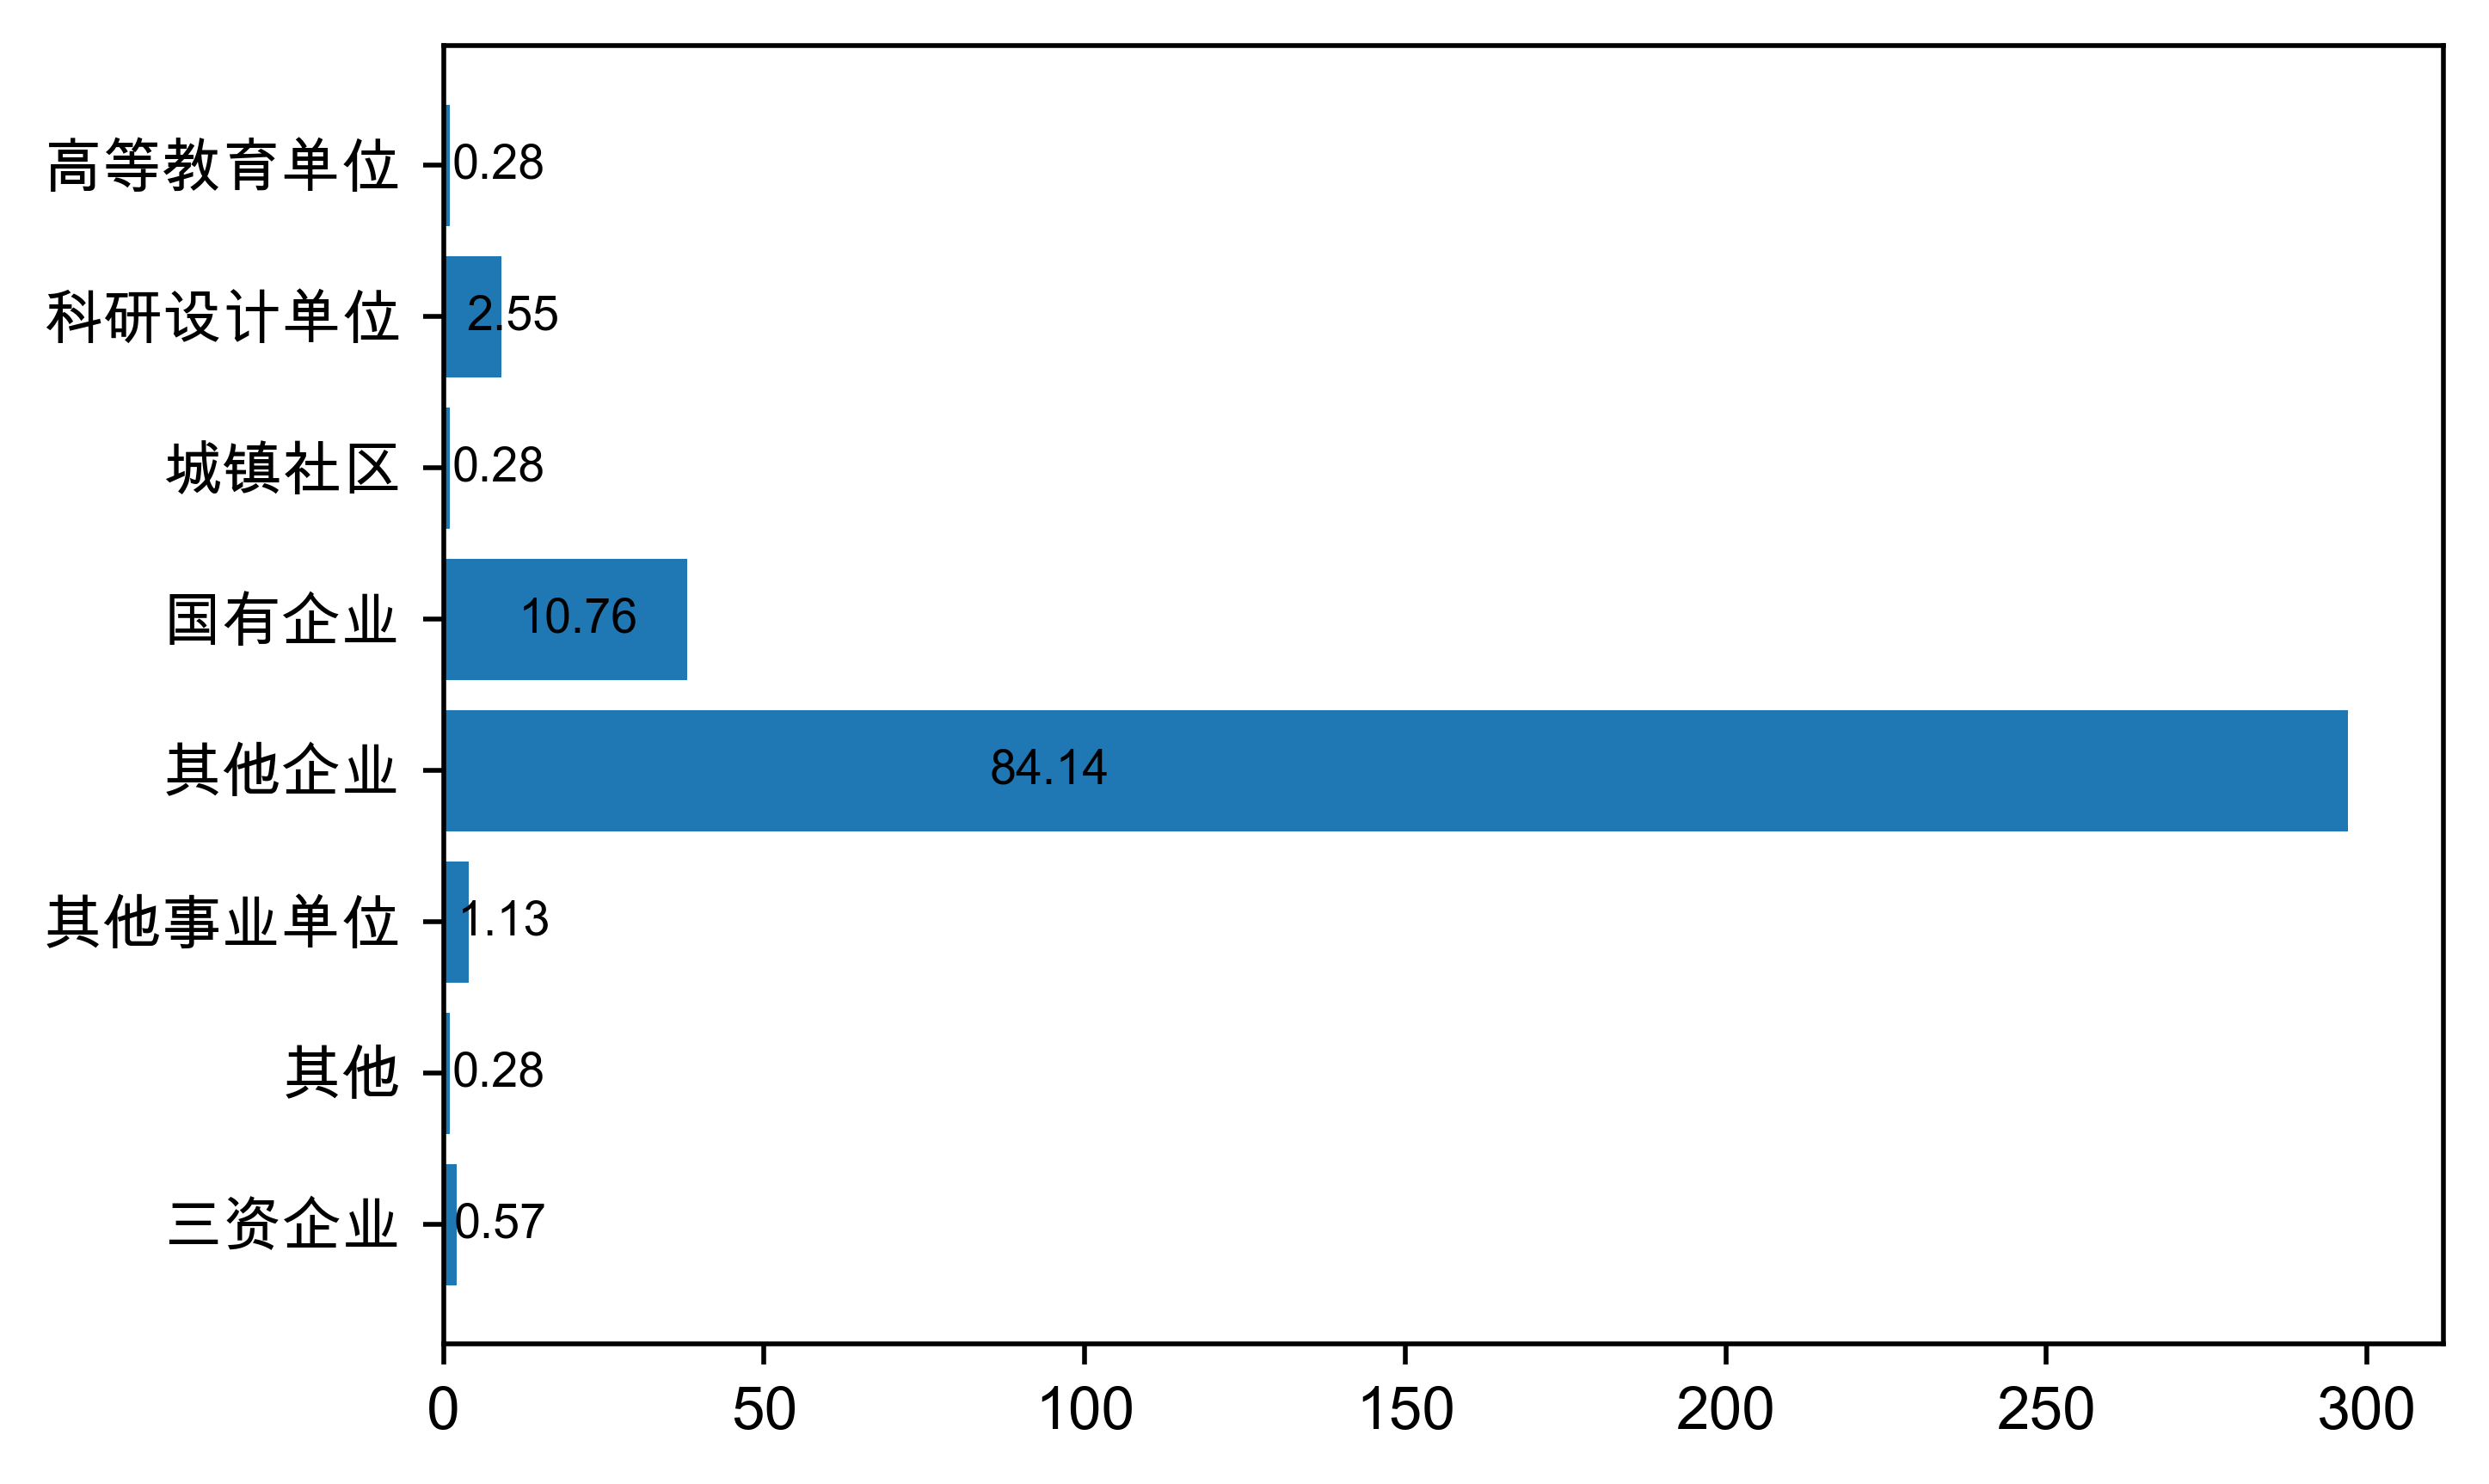

In [179]:
#企业性质数量图
plt.barh(range(len(character_['学号'])), character_['学号'],tick_label = character_['单位性质'])
for score, pos in zip((round((character_['学号']/353)*100,2)), range(len(character_['学号']))):
    plt.text(score + 1, pos,score, horizontalalignment='left', verticalalignment='center', fontsize=8)
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['figure.dpi'] = 500
plt.rcParams['font.size'] = 10.0

plt.show()

In [91]:
#单位所在地分析
#cols=['单位所在地','学号']
import cpca
import folium
place_info = work_account_2019['单位所在地']
##得到省份信息
province_info = cpca.transform(place_info)

AttributeError: module 'cpca' has no attribute 'drawer'

In [92]:
###单位所在地分布图
from cpca import drawer
drawer.draw_locations(province_info, "province.html")

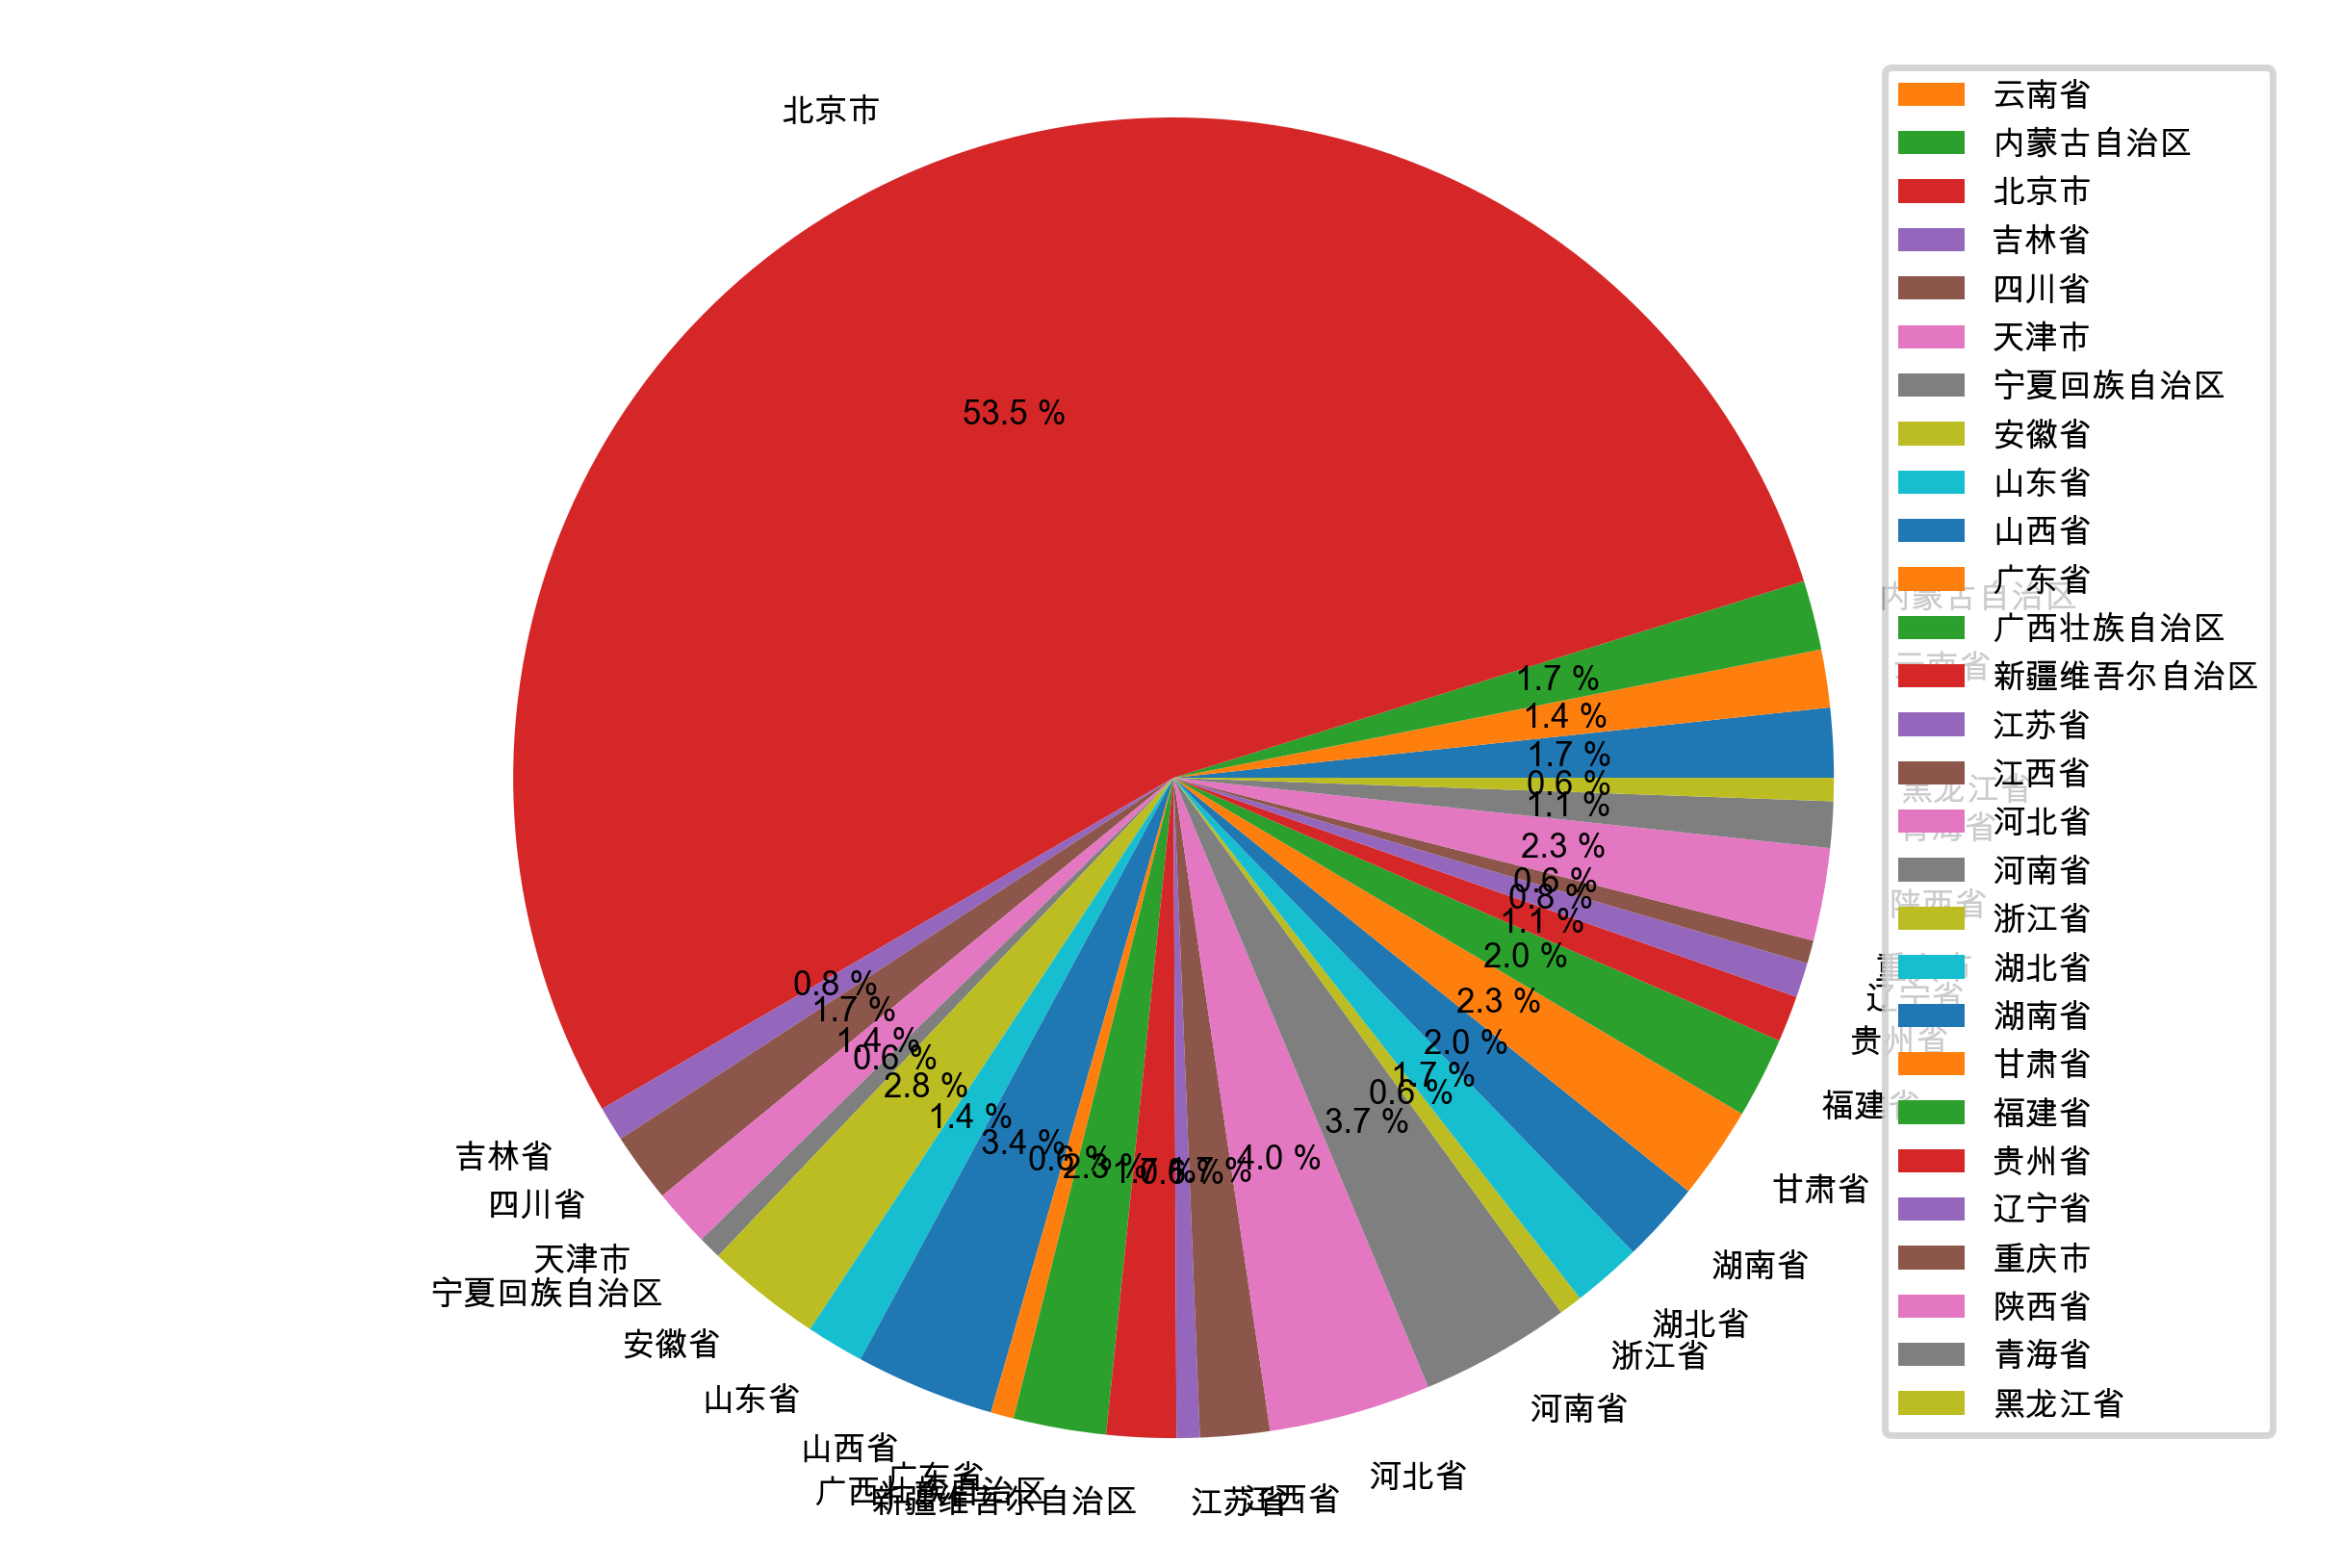

In [182]:
##单位所在地占比例
province_proportion = province_info.groupby(by=['省'],as_index=False).count()
cols=['省','市']
province_proportion = province_proportion[cols]
plt.pie(x=province_proportion['市'],labels = province_proportion['省'],autopct='%3.1f %%')
plt.axis('equal')
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['figure.dpi'] = 500
plt.rcParams['font.size'] = 5.0
plt.legend()
plt.show()

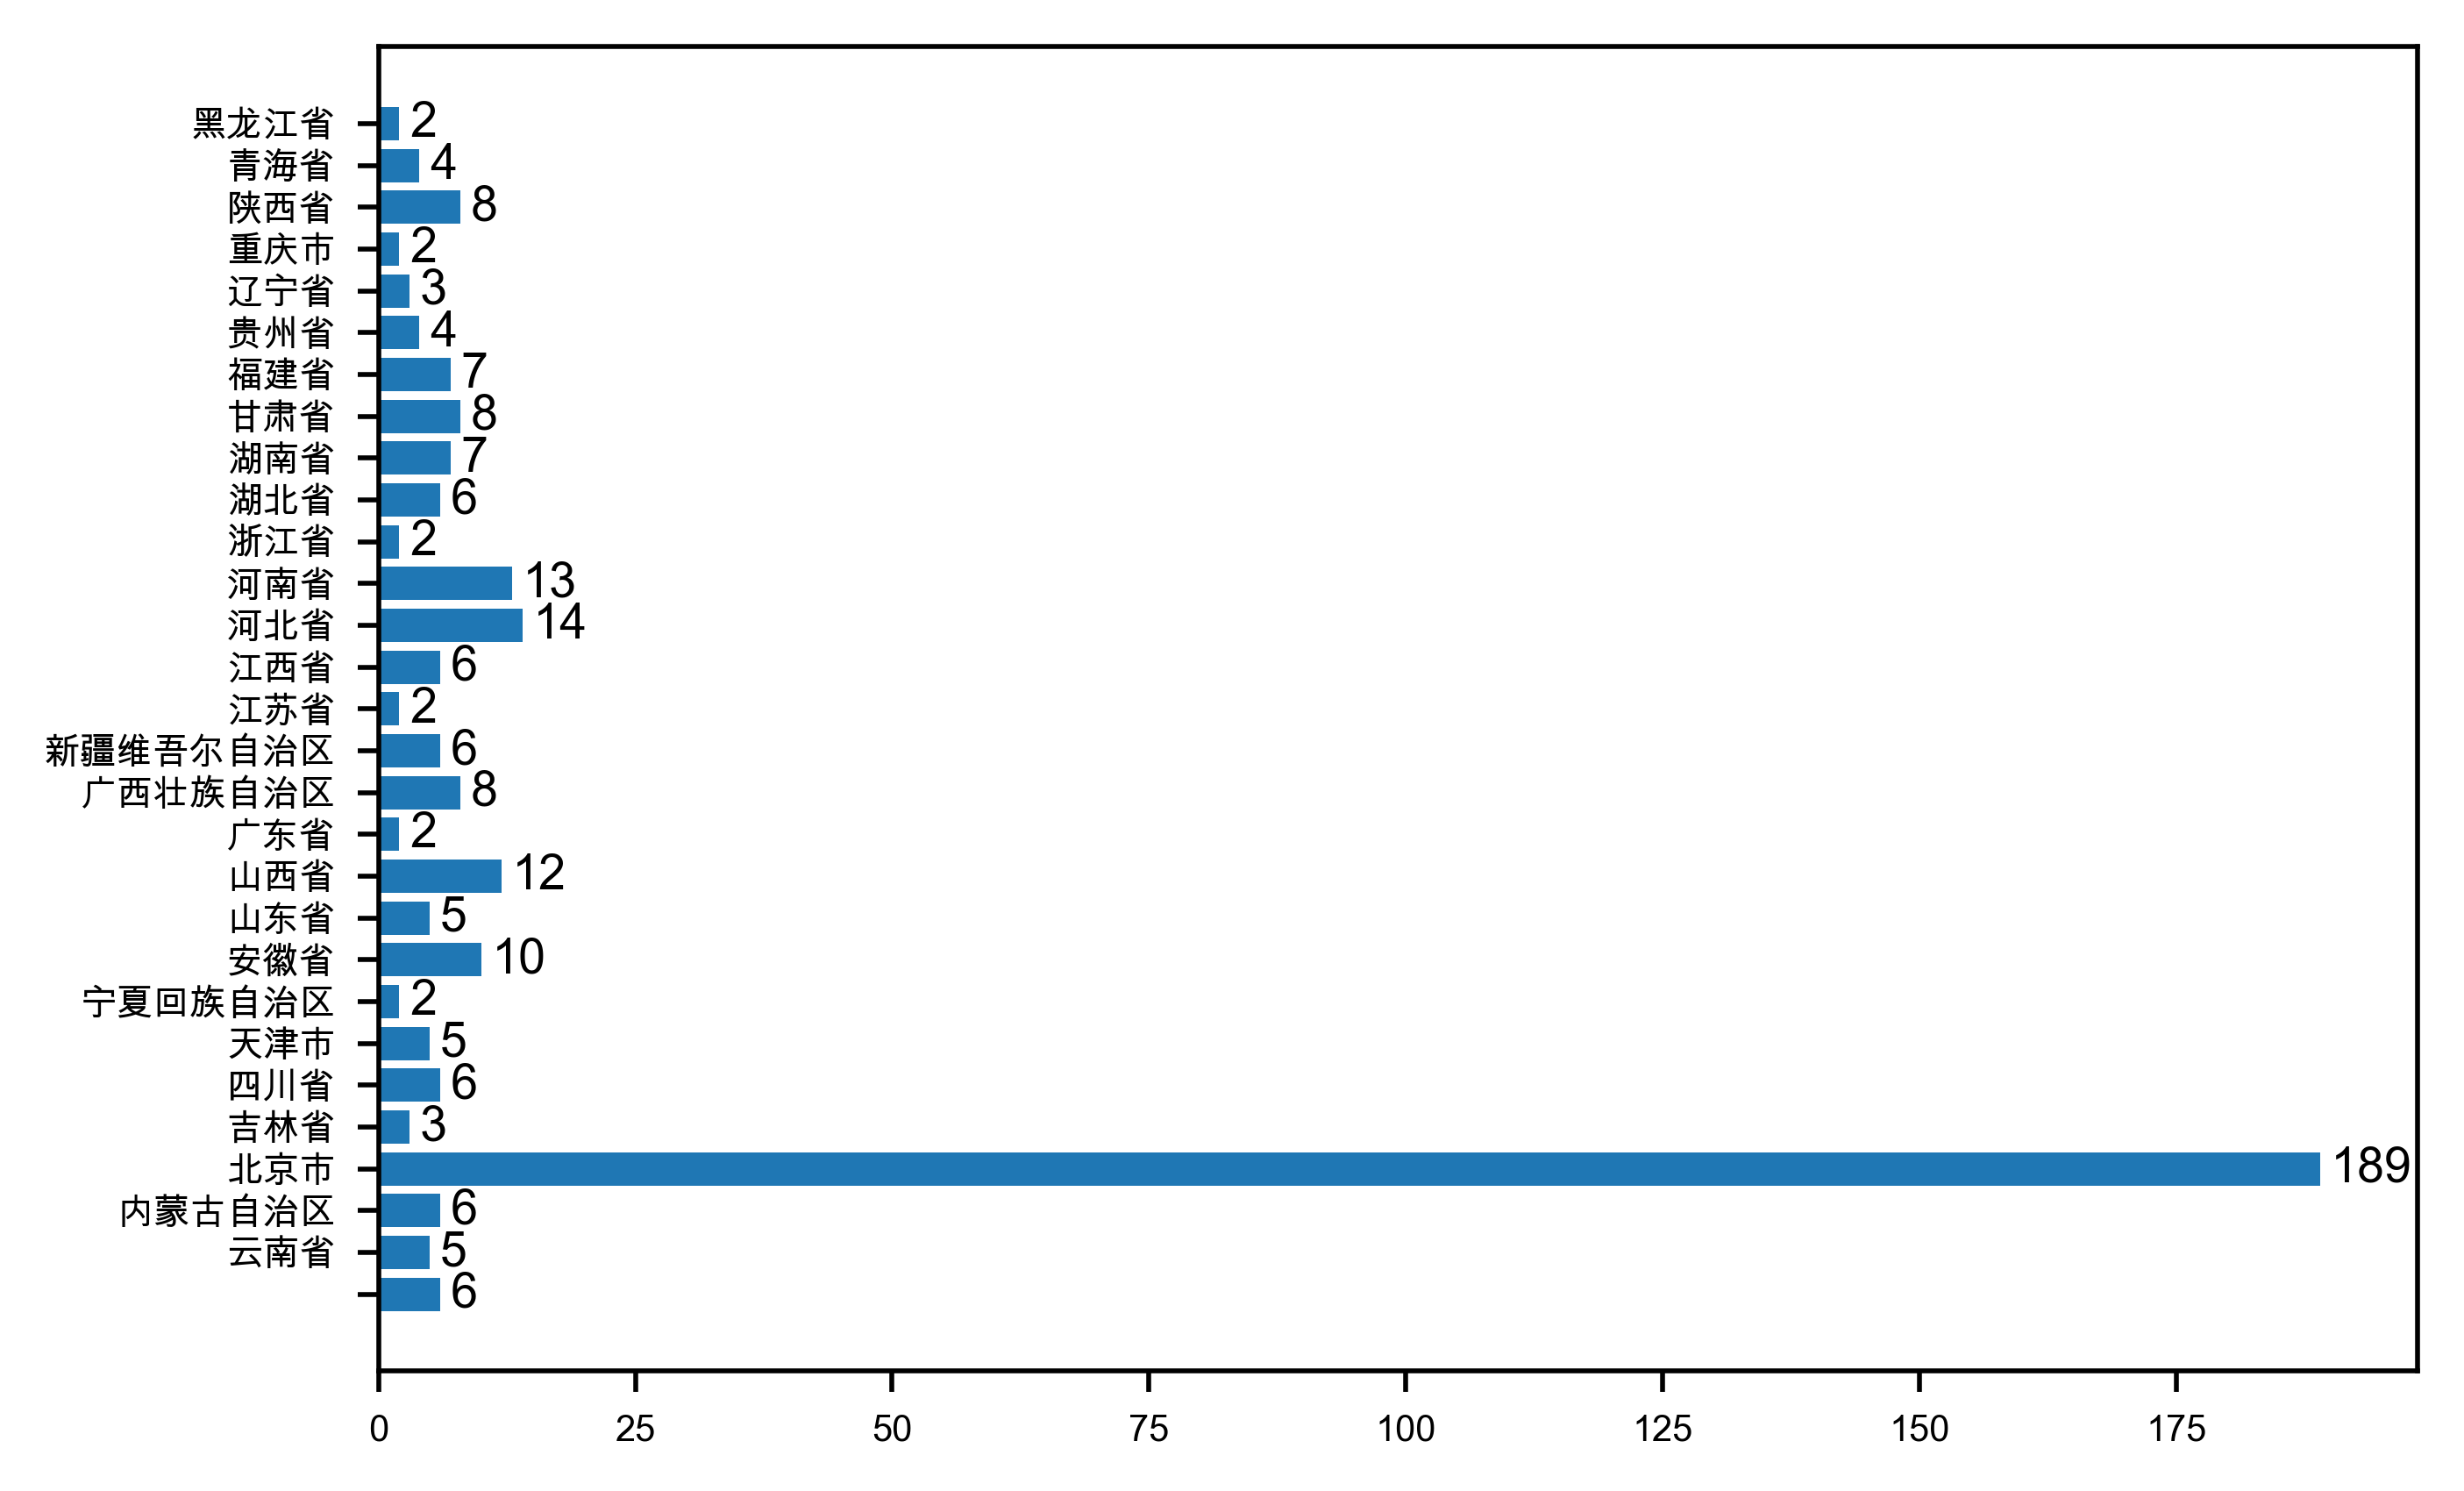

In [187]:
##单位所在地柱状图
plt.barh(range(len(province_proportion['市'])), province_proportion['市'],tick_label = province_proportion['省'])
for score, pos in zip((province_proportion['市']), range(len(province_proportion['市']))):
    plt.text(score + 1, pos,score, horizontalalignment='left', verticalalignment='center', fontsize=8)
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['figure.dpi'] = 500
plt.rcParams['font.size'] = 5.0
plt.show()

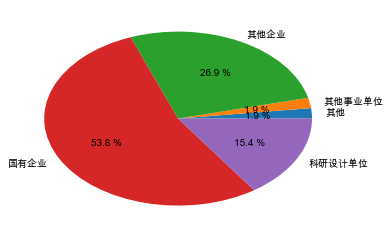

In [103]:
##派遣协议分析
paiqian_ = work_account_2019[work_account_2019['毕业去向'].isin(['派遣'])]
#派遣的单位性质
paiqian_character = paiqian_.groupby(by=['单位性质'],as_index=False).count()
cols=['单位性质','学号']
paiqian_character = paiqian_character[cols]
plt.pie(x=paiqian_character['学号'],labels = paiqian_character['单位性质'],autopct='%3.1f %%')
plt.show()

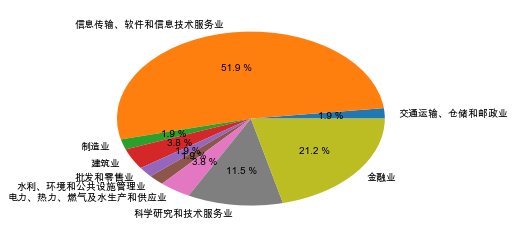

In [104]:
#派遣的单位行业分析
paiqian_weights = paiqian_.groupby(by=['单位行业'],as_index=False).count()
cols=['单位行业','学号']
paiqian_weights = paiqian_weights[cols]
plt.pie(x=paiqian_weights['学号'],labels = paiqian_weights['单位行业'],autopct='%3.1f %%')
plt.show()

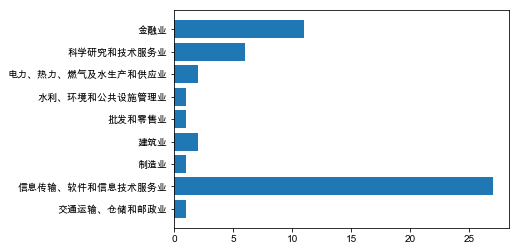

In [105]:
#派遣单位行业柱状图
plt.barh(range(len(paiqian_weights['学号'])), paiqian_weights['学号'],tick_label = paiqian_weights['单位行业'])
plt.show()

In [110]:
#计算2019年分专业的签约率

#2019年各专业数据,各专业人数
cs = df2019[df2019['专业'].isin(['计算机科学与技术','计算机科学与技术（互联网控制）（双培）','计算机科学与技术（专起本）'])]
cs_num = len(cs)
print('comuputer science:',cs_num)
ee = df2019[df2019['专业'].isin(['电子信息工程','电子信息工程（理工科实验班）','电子信息工程（专起本）'])]
ee_num = len(ee)
print('Electronic Energeer:',ee_num)
me = df2019[df2019['专业'].isin(['微电子科学与工程','微电双培'])]
me_num = len(me)
print('Micro Electronic',me_num)
ce = df2019[df2019['专业'].isin(['通信工程','通信工程（专起本）','通信双培'])]
ce_num = len(ce)
print('Communication Energeer:',ce_num)
shumei = df2019[df2019['专业'].isin(['数字媒体技术（游戏设计）（双培）','数字媒体技术','数字媒体技术（专起本）'])]
shumei_num = len(shumei)
print('Degital Media Technology:',shumei_num)
xinan = df2019[df2019['专业'].isin(['信息安全','信息安全（网络安全与执法）（双培）'])]
xinan_num = len(xinan)
print('Information security:',xinan_num)

comuputer science: 139
Electronic Energeer: 151
Micro Electronic 50
Communication Energeer: 108
Degital Media Technology: 73
Information security: 43


In [109]:
##出国的占比，去的国家的占比，典型学校占比
print(len(df2019))

564
